<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 45px; font-weight: bold; text-decoration: underline;">
   Batminton Dataset
</div>

<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 20px; font-weight: bold; text-decoration: underline;">
   Table of Content
</div>

1) Import Libraries: pandas, numpy, matplot, seaborn.
2) Load the CSV Data: Read the data from the CSV file.
3) Data Exploration: Display basic statistics and explore the dataset.
4) Data Visualization: Create visualizations to understand the distribution of various features.
5) Modeling: Train a classification model to predict whether a patient is infected or not.
6) Evaluation: Assess the performance of the model.
7) Graphs: Bar plot and Scatter plot.
8) Confusion Matrix

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay

Loading the Data

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/asus/python ml internship/badminton_dataset.csv")

# Display the first few rows of the dataset
print(df.head())

    Outlook Temperature Humidity    Wind Play_Badminton
0  Overcast        Cool     High    Weak            Yes
1     Sunny        Mild   Normal  Strong             No
2      Rain        Mild   Normal  Strong             No
3     Sunny        Cool     High    Weak            Yes
4     Sunny        Cool     High  Strong             No


Exploratory Data Analysis (EDA)

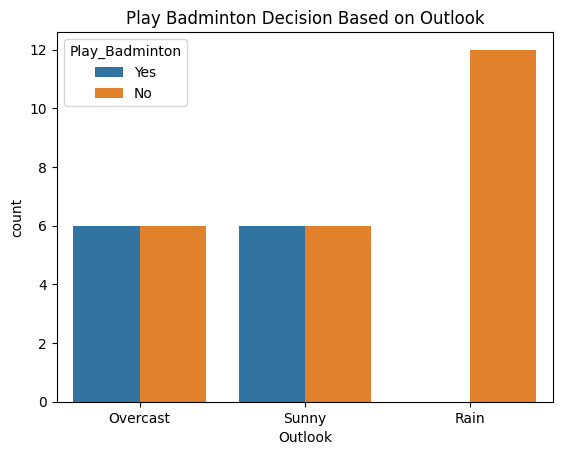

In [3]:
# Count plot for 'Play_Badminton' based on 'Outlook'
sns.countplot(x='Outlook', hue='Play_Badminton', data=df)
plt.title('Play Badminton Decision Based on Outlook')
plt.show()

 Data Preprocessing

In [4]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical variables
df['Outlook'] = le.fit_transform(df['Outlook'])
df['Temperature'] = le.fit_transform(df['Temperature'])
df['Humidity'] = le.fit_transform(df['Humidity'])
df['Wind'] = le.fit_transform(df['Wind'])
df['Play_Badminton'] = le.fit_transform(df['Play_Badminton'])

print(df.head())

   Outlook  Temperature  Humidity  Wind  Play_Badminton
0        0            0         0     1               1
1        2            2         1     0               0
2        1            2         1     0               0
3        2            0         0     1               1
4        2            0         0     0               0


Model Building

In [5]:
# Define features and target variable
X = df.drop('Play_Badminton', axis=1)
y = df['Play_Badminton']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 1.0
Confusion Matrix:
[[5 0]
 [0 3]]


 Model Evaluation

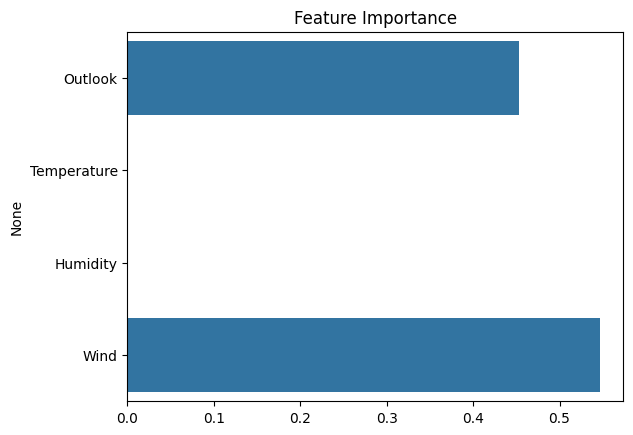

In [6]:
# Feature importance (for tree-based models)
feature_importance = model.feature_importances_

# Plot feature importance
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance')
plt.show()

COUNT PLOT

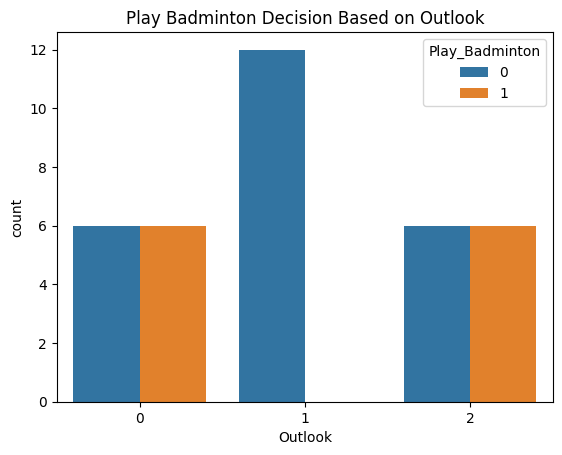

In [7]:
sns.countplot(x='Outlook', hue='Play_Badminton', data=df)
plt.title('Play Badminton Decision Based on Outlook')
plt.show()

Bar Plot

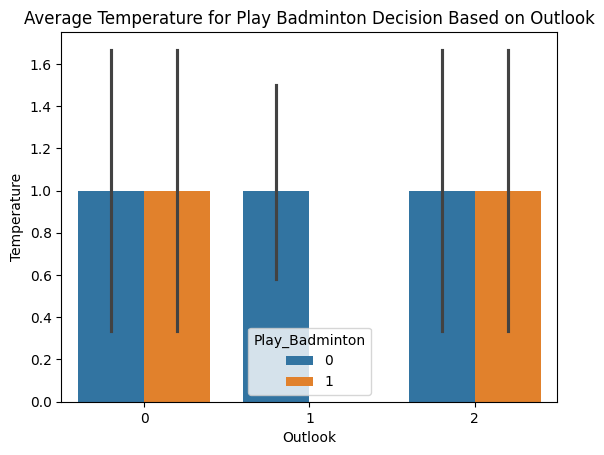

In [8]:
sns.barplot(x='Outlook', y='Temperature', hue='Play_Badminton', data=df)
plt.title('Average Temperature for Play Badminton Decision Based on Outlook')
plt.show()

Heatmap

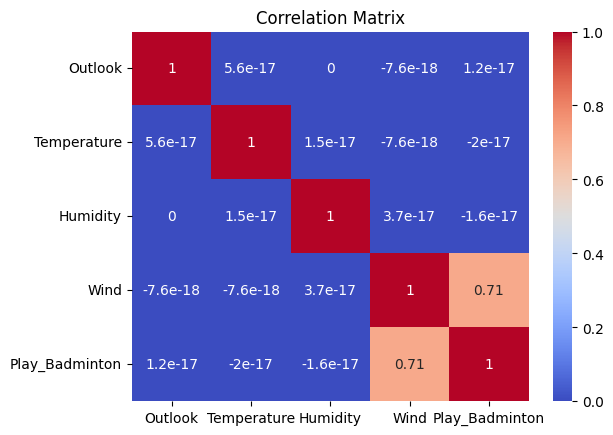

In [9]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Box Plot

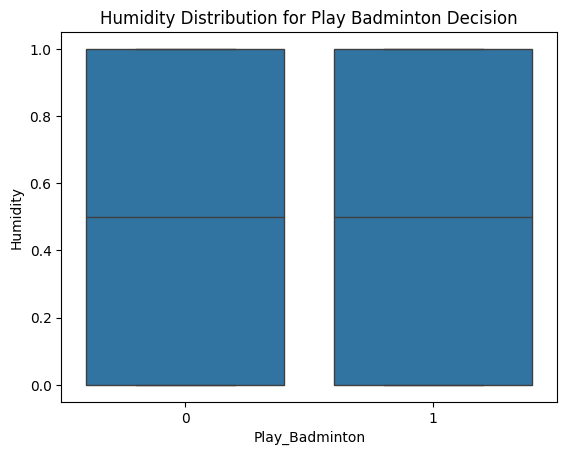

In [10]:
sns.boxplot(x='Play_Badminton', y='Humidity', data=df)
plt.title('Humidity Distribution for Play Badminton Decision')
plt.show()

Pair Plot

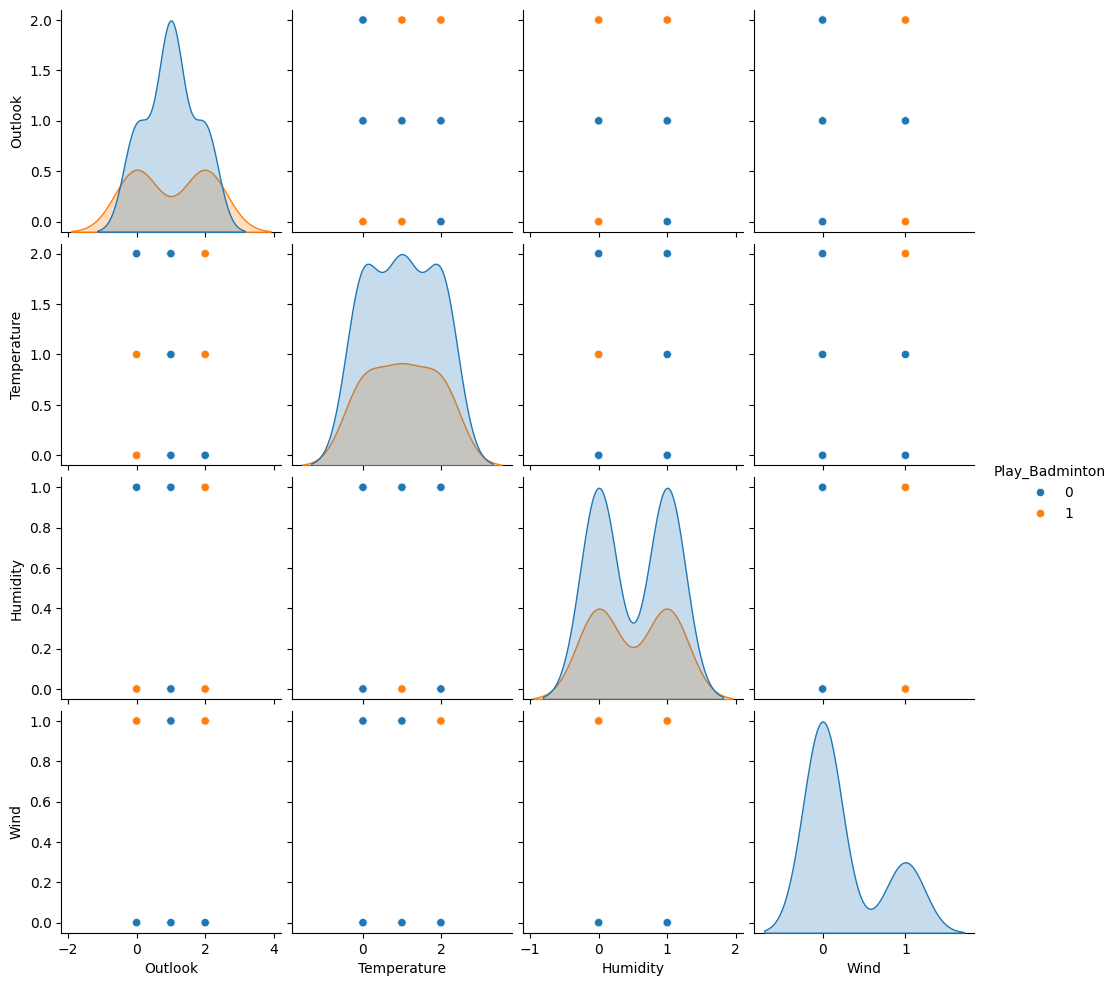

In [11]:
sns.pairplot(df, hue='Play_Badminton')
plt.show()

Decision Tree Visualization

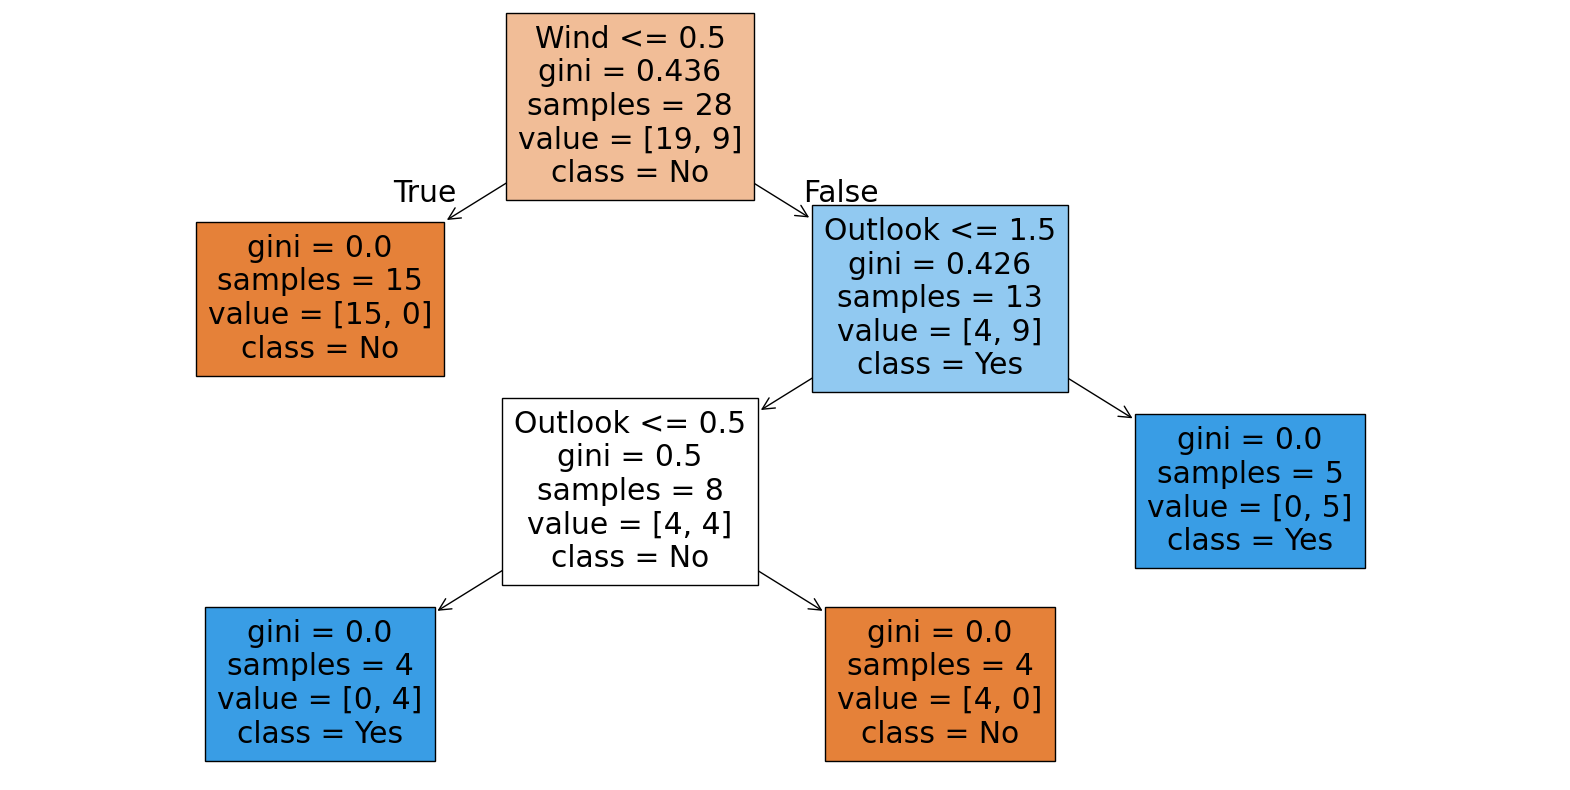

In [12]:

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

 Confusion Matrix

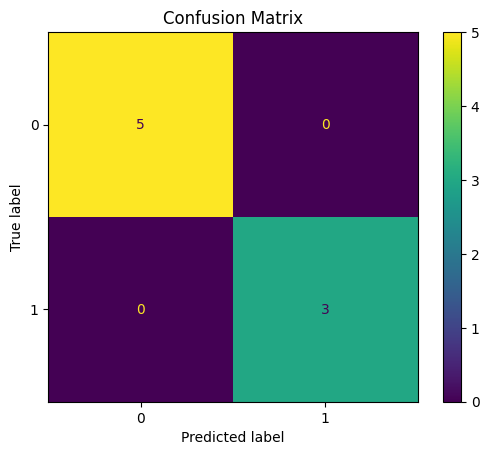

In [13]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


Feature Importance Plot

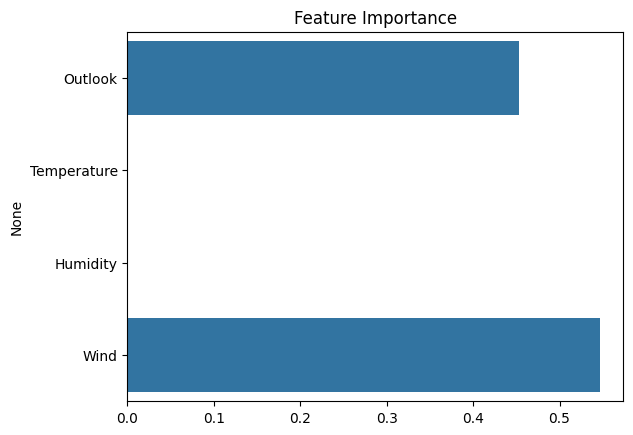

In [14]:
feature_importance = model.feature_importances_
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance')
plt.show()